#     <center>        Thai Restaurant vs. Mexican Restaurant in NYC </center>

<img src="https://www.nycinsiderguide.com/wp-content/uploads/2019/05/restaurant-week-new-york-city.jpg" alt= "Various Cuisine Image" width="600" height="300" > 


# Overview
This project analyzes Yelp restaurant data in New York City. The analysis shows a competitive landscape in the NYC restaurant industry, with many options in all cuisines, prices and restaurant offerings.

# Business Problem
Restaurant investors who specialize in both Thai and Mexican cuisines need data analysis to see which cusine would be more successful in New York City. Data shows that both types of cuisines are abundant in the city, which required a deeper analysis to determine which type of restaurant would be a better investment. 

# Data
The Yelp Fusion API allows users to retreive various data regarding different businesses. Every business has descriptive data associated with its business including a unique id, price, rating, etc. Additionally, each business has review data associated with it, which included a unique review id, date the review was created, and the text. In order to have a deep analysis, both business and review data for several businesses were pulled and analyzed.

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime
from functions import *

### Business Data
The Thai and Mexican restaurant data sets include a variety of columns. The analysis primarily focused on price, rating, review count, and transaction type columns. After pulling in the data from the Yelp API, the data was parsed, then saved as a csv file.

In [10]:
thaidf.head(2)

,Unnamed: 0,Id,Name,Location,Rating,Price,Zipcode,Pickup,Delivery,Reservation,Review Count,Categories,Status,type
0,0.0,uazg6WhYVOw3jhWCG_MDBg,Sup Thai Kitchen,178-19 Union Tpke,4.5,2,11366,True,True,False,374,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",False,Thai
1,1.0,cegA4jf16vEt7NCQ7cpu2w,Kin'd,192-03 Union Tpke,4.5,2,11366,True,True,False,768,"[{'alias': 'thai', 'title': 'Thai'}]",False,Thai


In [11]:
mexdf.head(2)

,Unnamed: 0,Id,Name,Location,Rating,Price,Zipcode,Pickup,Delivery,Reservation,Review Count,Categories,Status,type
0,0.0,7YYp_2WYWdRSt_NohV7Psw,Casa Birria NYC,86th & 3rd Ave,5.0,0,10028,False,False,False,14,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",False,Mexican
1,1.0,6Ct7OeTRn4caY9g0swFBsw,La Contenta,102 Norfolk St,4.5,2,10002,True,True,False,765,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",False,Mexican


### Review Data

Review data was pulled per every restaurant from the business day. The columns focused on were the date, review rating, and review text. After pulling in this data, it was parsed and saved as a csv file as well.

In [12]:
thai_rev_df.head(2)

,Unnamed: 0,Business ID,ID,Review,Rating,Date
0,0,uazg6WhYVOw3jhWCG_MDBg,eoqQ6cSoPLOd7YWAjWNS4A,"Sadly due to Covid 19 disaster , we avoid eati...",5,2020-12-25 15:29:31
1,1,uazg6WhYVOw3jhWCG_MDBg,jth1qrL_taRqkxNe0r5xSw,Sup Thai Kitchen was recommended by our friend...,5,2020-11-14 18:27:22


In [13]:
mex_rev_df.head(2)

,Unnamed: 0,Business ID,ID,Review,Rating,Date
0,0,7YYp_2WYWdRSt_NohV7Psw,kfThRpF-hjfWjwyPgSAYRw,Must try: Three Tacos Combo and Consomé!\n\nWh...,5,2021-01-18 07:21:31
1,1,7YYp_2WYWdRSt_NohV7Psw,jxOA8wOzDGbi9BNq7h47iw,If you're looking for birria tacos but don't w...,4,2021-02-03 08:34:45


### Data Preperation

After removing duplicate header rows, setting the index to a unique identifier, and casting several columns to ideal data types (i.e. rating column was converted to float), the business data was merged.

In [14]:
df.head(2)

,Name,Location,Rating,Price,Zipcode,Pickup,Delivery,Reservation,Review Count,Categories,Status,type
Id,,,,,,,,,,,,
uazg6WhYVOw3jhWCG_MDBg,Sup Thai Kitchen,178-19 Union Tpke,4.5,$$,11366,True,True,False,374,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",False,Thai
cegA4jf16vEt7NCQ7cpu2w,Kin'd,192-03 Union Tpke,4.5,$$,11366,True,True,False,768,"[{'alias': 'thai', 'title': 'Thai'}]",False,Thai


# Analysis
### Restaurant Prices
Most thai and mexican restaurants fall withing the one to two dollar sign pricing, this creating an opportunity for a more upscale restaurant in the three or more dollar sign price range.

Prices from the Yelp API were provided as `$` string objects, so in order to utilize the data, it was converted to an integer representing the number of `$` in the string.

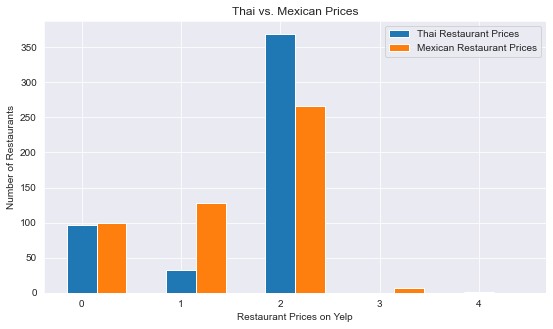

In [3]:
rest_price_visual()

### Restaurant Services
The majority of restaurants in either cuisine type offer both pickup and delivery options. The lack of Thai and Mexican restaurants offering reservations leads to room for growth for restaurants with dine-in services. The demand for dine-in services are likely to grow post COVID-19.

The Yelp API grouped together all services as one column, so in order to better utilize the data, seperate columns were created to categorize each service type seperately. 

/Users/anishamalhotra/Documents/Flatiron/Phase1Project/Code/functions.py:180: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes.set_xticks(ind + width/ 2, ('Pickup', 'Delivery', 'Reservation'))
/Users/anishamalhotra/Documents/Flatiron/Phase1Project/Code/functions.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['','Pickup','', 'Delivery','', 'Reservation'])


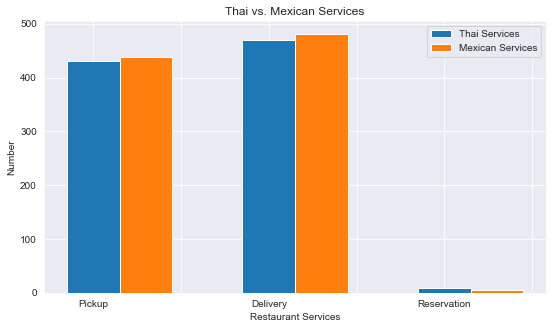

In [2]:
rest_services_visual()

### Restaurant Ratings

Ratings for both types of cuisines are similar (mean and median = 4.0), which requires a deeper analysis in order to make a decision between both cuisine types.


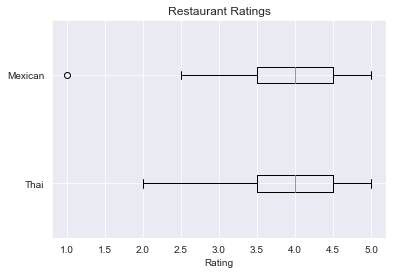

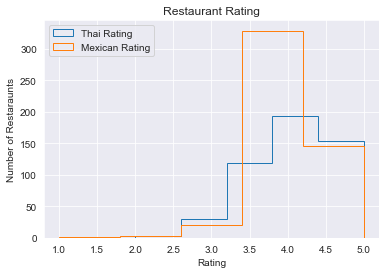

In [15]:
rating_box_and_whisk()
rating_hist()

### High Performance Restaurants
After filtering our restaurants to those with ratings with a 4.5 or higher and review count of 100 and higher, the data showed most restaurants were Thai. Therefore, higher quality Mexican restaurant have less competition and increased opportunity for growth.

/Users/anishamalhotra/Documents/Flatiron/Phase1Project/Code/functions.py:270: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Thai', 'Mexican'])


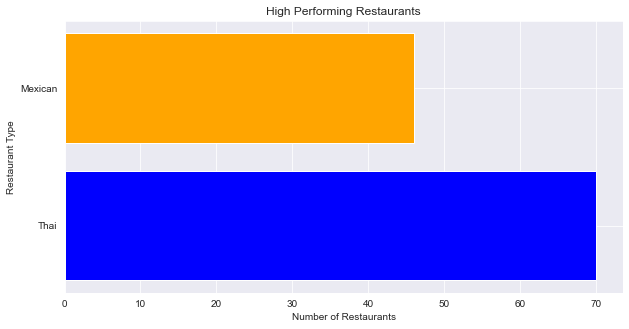

In [6]:
high_performingrest_visual()

# Conclusion
This analysis leads to three recommendations potential restuarant investments in New York City:

<ul>
  <li><b>Design a restaurant catered towards a more upscale experience.</b> The majority of Thai and Mexican restaurants are at a lower price point, which creates opportunity for higher priced restaurants.</li>
    
  <li><b>Offer a dine-in experience which allows for making reservations.</b> Currently, the Thai and Mexican restaurant is flooded with pickup and delivery options, not leaving enough room for those who enjoy the dine-in experience.</li>
    
  <li><b>Focus on the Mexican Cuisine Industry.</b> Due to the volume of Thai restuarants with high ratings and reviews, the Mexican restaurant industry offers less competition based on the higher quality metric.</li>
</ul>

# Next Steps

Further analysis could benefit from the following:
<ul>
  <li> Thorough analysis on costs of running a restaurant (e.g. ingredient costs, staff costs, real-estate, licensing, etc.)</li>
  <li> Numerical price data in order to have a more detailed analysis</li>
  <li> Get full text of each review to allow further analysis on customer satisfaction</li>
</ul>


 


